# b_SOM_kmeans_process is designed to find the optimal number of clusters through SOM_kmeans and visualize the urban heat island (UHI) data for different cluster numbers.

Here is the specific process breakdown:

#### 04 Use SOM for feature extraction and K-means for clustering.
> 04_00 The initial code that needs to be run every time.
> 04_01 Use SOM to extract features, with the U-matrix as the distance, and apply K-means clustering to generate an SSE box plot for K within the K_range.
> 04_02 Store both scaled and original data into CSV files.

#### 05 Reorder clusters, obtain a sorted cluster CSV file from largest to smallest, and calculate the average value for the sorted clusters.

#### 06 Analyze the final images of the moving average UHI data for different clusters.

# 04_00 每次运行的时候都需要先运行的代码。

In [ ]:
import pandas as pd

# 读取 CSV 文件
d = pd.read_csv(r'D:\file\c_moving_average(MA)\223_cities_combined_moving_ave.csv')

# 调整 pandas 显示选项
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', 200)

# 打印前 5 行数据
print(d.head())

# 获取并打印行数和列数
print(f"Rows: {d.shape[0]}, Columns: {d.shape[1]}")

In [ ]:
import numpy as np

# 文件路径
bmus_path = r'D:\file\new som\BMUs.npy'
weights_path = r'D:\file\new som\node_weights.npy'

# 加载 .npy 文件
bmus = np.load(bmus_path)
node_weights = np.load(weights_path)

# 打印基本信息
print("BMUs shape:", bmus.shape)
print("BMUs data:\n", bmus)

print("Node Weights shape:", node_weights.shape)
print("Node Weights data:\n", node_weights)

In [ ]:
import numpy as np
import pandas as pd

output_file = r'D:\file\d_som\node_weights.csv'

# 创建一个空的 DataFrame 来保存结果
df = pd.DataFrame(columns=['num_nodes'] + [f'feature_{i}' for i in range(node_weights.shape[1])])

# 填充 DataFrame
num_node = 0
for i in range(node_weights.shape[0]):  # 假设有 1955 个节点
    # 将每个节点的数据写入 DataFrame
    df = df.append({'num_nodes': num_node, **{f'feature_{j}': node_weights[i, j] for j in range(node_weights.shape[1])}}, ignore_index=True)
    num_node += 1

# 将结果保存为 CSV 文件
df.to_csv(output_file, index=False)

print(f"数据已保存到 {output_file}")
##################################
# 读取原始数据
input_file = r'D:\file\d_som\node_weights.csv'
df = pd.read_csv(input_file)

# 假设有 17 行和 115 列的网格
x_size, y_size = 17, 115

# 创建 BMU_X 和 BMU_Y 列
bmu_x = []
bmu_y = []

# 修正计算 BMU_X 和 BMU_Y
for num_node in range(df.shape[0]):  # 假设有 1955 个节点
    bmu_y.append(num_node % y_size)  # 使用模运算计算 Y 坐标
    bmu_x.append(num_node // y_size)  # 使用整除计算 X 坐标

# 将 BMU_X 和 BMU_Y 列添加到 DataFrame 中
df['BMU_X'] = bmu_x
df['BMU_Y'] = bmu_y

# 保存新的 CSV 文件
output_file = r'D:\file\d_som\node_weights_with_bmu.csv'
df.to_csv(output_file, index=False)

print(f"数据已保存到 {output_file}")
################################
from sklearn.cluster import KMeans

# 使用 K-means 聚类
kmeans = KMeans(n_clusters=11, random_state=42)  # 设置你需要的聚类数
kmeans.fit(node_weights)  # (num_nodes, feature_dim) = (1955, 2178)

# 聚类结果：每个节点的标签
labels = kmeans.labels_

# 读取原始的 CSV 文件
input_file = r'D:\file\d_som\node_weights_with_bmu.csv'
df = pd.read_csv(input_file)

# 将 K-means 聚类的结果作为新的一列 'Cluster' 添加到 DataFrame
df['Cluster'] = labels

# 保存修改后的 CSV 文件
output_file = r'D:\file\d_som\node_weights_with_bmu_and_cluster.csv'
df.to_csv(output_file, index=False)

print(f"数据已保存到 {output_file}")
################################

# 读取 cluster 文件
cluster_df = pd.read_csv(r'D:\file\d_som\node_weights_with_bmu_and_cluster.csv')

# 删除除了 'num_nodes', 'BMU_X', 'BMU_Y', 'Cluster' 以外的列
cluster_df = cluster_df[['num_nodes', 'BMU_X', 'BMU_Y', 'Cluster']]

# 查看处理后的 DataFrame
print(cluster_df.head())

# 如果需要，可以将处理后的数据保存为新的 CSV 文件
output_file = r'D:\file\d_som\node_weights_clean.csv'
cluster_df.to_csv(output_file, index=False)

print(f"数据已保存到 {output_file}")


In [ ]:
import numpy as np
import pandas as pd

# 将 BMUs 数据转化为 DataFrame，并添加默认的索引列
df = pd.DataFrame(bmus, columns=['BMU_X', 'BMU_Y'])

# 添加默认的索引列并命名为 'index'
df['index'] = df.index

# 输出文件路径
output_file = r'D:\file\d_som\BMUs.csv'

# 将 DataFrame 保存为 CSV 文件
df.to_csv(output_file, index=False)

print(f"数据已保存到 {output_file}")


In [ ]:
import pandas as pd

# 读取 cluster_file 和 bmus_file
cluster_df = pd.read_csv(r'D:\file\d_som\node_weights_with_bmu_and_cluster.csv')
bmus_df = pd.read_csv(r'D:\file\d_som\BMUs.csv')

# 通过 BMU_X 和 BMU_Y 合并两个 DataFrame，使用左连接（left join）
merged_df = pd.merge(bmus_df, cluster_df[['BMU_X', 'BMU_Y', 'Cluster']], on=['BMU_X', 'BMU_Y'], how='left')

# 保存合并后的结果到新文件
output_file = r'D:\file\d_som\BMUs_with_cluster.csv'
merged_df.to_csv(output_file, index=False)

print(f"数据已保存到 {output_file}")

# 06 分析不同的cluster的热岛滑动平均数最终的图像
分析不同聚类的热岛滑动平均数，并检查数据中是否存在NaN或Inf值。
清除异常值并生成最终的可视化图像。

In [ ]:
import pandas as pd

# 读取输入文件
input_cities_file = pd.read_csv(r'D:\file\c_moving_average(MA)\223_cities_combined_moving_ave.csv')
input_bmus_cluster_file = pd.read_csv(r'D:\file\d_som\BMUs_with_cluster.csv')

# 将 BMUs 文件中的 Cluster 列根据默认索引赋值给城市数据文件
input_cities_file['Cluster'] = input_bmus_cluster_file['Cluster']

# 将结果保存为新的 CSV 文件
output_cluster_file = r'D:\file\d_som\223_cities_combined_moving_ave_cluster.csv'
input_cities_file.to_csv(output_cluster_file, index=False)

print(f"数据已保存到 {output_cluster_file}")

In [ ]:
file_name = pd.read_csv(output_cluster_file)
print(file_name.iloc[0:5,0:3])

In [ ]:
import pandas as pd

def sort_clusters_and_save(input_file_path, output_file_path):
    # 读取数据
    df = pd.read_csv(input_file_path, encoding='gbk')

    # 将 "X" 和 "Y" 列作为索引，这两列不需要进行聚类
    df.set_index(["X", "Y"], inplace=True)

    # 排除不需要计算平均值的列
    excluded_columns = ["Place ID", "Sum ID", "City Name", "Place"]
    columns_to_average = [col for col in df.columns if col not in excluded_columns + ["X", "Y"]]

    # 计算每个 Cluster 中的均值
    cluster_means = df[columns_to_average].groupby("Cluster").mean()

    # 计算每个 Cluster 的均值，并按照均值排序
    sorted_clusters = cluster_means.mean(axis=1).sort_values()

    # **修正 cluster_mapping**
    cluster_mapping = {old_cluster: new_cluster for new_cluster, old_cluster in enumerate(sorted_clusters.index)}

    # 更新 Cluster 列的值为新的编号
    df["Cluster"] = df["Cluster"].map(cluster_mapping)

    # 保存更新后的 DataFrame
    df.to_csv(output_file_path, encoding='gbk')

K_range = [11]

for K in K_range:
    cluster_origin_file = r'D:\file\d_som\223_cities_combined_moving_ave_cluster.csv'
    cluster_processed_file = r'D:\file\d_som\223_cities_combined_moving_ave_cluster_sort.csv'
    sort_clusters_and_save(cluster_origin_file, cluster_processed_file)


In [ ]:
file_name = pd.read_csv(cluster_processed_file)
print(file_name)

In [ ]:
file_name = pd.read_csv(cluster_origin_file)
print(file_name)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pydlc import dense_lines
import numpy as np

def plot_cluster_data(file_path, K, output_folder):
    # 读取CSV文件
    data = pd.read_csv(file_path)

    # # 检查并清除包含 NaN 或 Inf 值的行
    # if np.isnan(data.values).any() or np.isinf(data.values).any():
    #     # 打印包含 NaN 和 Inf 值的行
    #     print("原始数据框包含 NaN 或 Inf 值：")
    #     print(data)
    #
    #     # 打印 NaN 和 Inf 值的位置
    #     nan_mask = np.isnan(data.values)
    #     inf_mask = np.isinf(data.values)
    #
    #     nan_positions = np.where(nan_mask)
    #     inf_positions = np.where(inf_mask)
    #
    #     if len(nan_positions[0]) > 0:
    #         print("NaN 值及其位置：")
    #         for row, col in zip(nan_positions[0], nan_positions[1]):
    #             print(f"NaN 值在行 {row}, 列 {col}")
    #
    #     if len(inf_positions[0]) > 0:
    #         print("Inf 值及其位置：")
    #         for row, col in zip(inf_positions[0], inf_positions[1]):
    #             print(f"Inf 值在行 {row}, 列 {col}")
    #
    #     # 删除包含 NaN 或 Inf 值的行
    #     data = data.dropna().replace([np.inf, -np.inf], np.nan).dropna()
    #
    #     # 打印清理后的数据框
    #     print("清理后的数据框：\ndata")
    # else:
    #     print("数据框中不包含 NaN 或 Inf 值。")

    # 获取所有的 cluster 值
    clusters = data['Cluster'].unique()

    # 遍历每个 cluster
    for cluster in clusters:
        # 筛选出当前 cluster 的数据
        cluster_data = data[data['Cluster'] == cluster]
        print(cluster_data)
        cluster_data_to_plot = cluster_data.iloc[:, 2:-5]

        # 创建图表
        fig, ax = plt.subplots(figsize=(20, 6))
        fig.patch.set_facecolor('white')  # 设置图形背景为白色
        ax.set_facecolor('white')  # 设置轴背景为白色

        # 获取列数
        columns = np.arange(cluster_data_to_plot.shape[1])

        # 绘制中值折线图
        ax.plot(columns, cluster_data_to_plot.median(), linestyle='-', color='b', label='Median', linewidth=1, zorder=10)

        # 使用 dense_lines 绘制密度线图
        im = dense_lines(cluster_data_to_plot.values, x=columns, ax=ax, cmap='hot_r')
        fig.colorbar(im, ax=ax)

        # 设置图表布局和标题
        ax.set_title(f'sorted_clustered_(K={K})_Cluster {cluster}', fontsize=20)
        ax.set_xlabel('DAY', fontsize=14)
        ax.set_ylabel('slide_TEM', fontsize=14)

        # 删除竖直网格线
        #ax.grid(which='major', axis='y', linestyle='dotted')
        ax.grid(False)  # 完全去掉所有网格线

        ax.set_ylim(-10, 10)  # 纵坐标是-100到100

        # 设置 X 轴刻度和标签
        ax.set_xticks(columns[::50])  # 每隔50个数据点设置一个刻度
        ax.set_xticklabels(columns[::50])  # 设置对应刻度的标签为 columns 数组中的值

        # 旋转 x 轴标签，避免重叠
        plt.xticks(rotation=90)

        # 设置 x 轴范围，保证宽度匹配 figsize=(20, 6)
        ax.set_xlim(0, len(columns))  # 设置 x 轴范围为 0 到总列数

        # 调整布局，确保图像居中显示
        plt.tight_layout()

        # 保存图像为 JPG 格式
        os.makedirs(output_folder, exist_ok=True)
        output_file = os.path.join(output_folder, rf'sorted_clustered_som_kmeans_data(K={K})_{cluster}.jpg')
        plt.savefig(output_file, format='jpg', dpi=100, bbox_inches='tight')

        # 显示图表
        plt.show()

K_range=[11]

for K in K_range:
    file_path = rf'D:\file\d_som\223_cities_combined_moving_ave_cluster_sort.csv'
    output_folder = rf'D:\file\d_som\results\picture\K={K}'
    os.makedirs(output_folder, exist_ok=True)

    plot_cluster_data(file_path, K, output_folder)

In [ ]:
import pandas as pd
file_path = rf'D:\file\d_som\223_cities_combined_moving_ave_cluster_sort.csv'
data = pd.read_csv(file_path)
data

In [ ]:
!{sys.executable} -m pip install pydlc

# 以城市为标准进行图像绘制

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pydlc import dense_lines
import numpy as np

def plot_cluster_data(file_path, K, output_folder):
    # 读取CSV文件
    data = pd.read_csv(file_path)
    # 获取所有的 cluster 值
    cities = data['Place'].unique()

    for city in cities:

        city_data = data[data['Place'] == city]
        place_id = city_data['City Name'].iloc[0]
        # 获取所有的 cluster 值
        clusters = city_data['Cluster'].unique()
        # 遍历每个 cluster
        for cluster in clusters:
            # 筛选出当前 cluster 的数据
            cluster_data = city_data[city_data['Cluster'] == cluster]
            print(cluster_data)
            cluster_data_to_plot = cluster_data.iloc[:, 2:-5]

            # 创建图表
            fig, ax = plt.subplots(figsize=(20, 6))
            fig.patch.set_facecolor('white')  # 设置图形背景为白色
            ax.set_facecolor('white')  # 设置轴背景为白色

            # 获取列数
            columns = np.arange(cluster_data_to_plot.shape[1])

            # 计算统计量
            median = cluster_data_to_plot.median()
            q1 = cluster_data_to_plot.quantile(0)
            q3 = cluster_data_to_plot.quantile(1)

            # 绘制中位数线
            ax.plot(columns, median, linestyle='-', color='b', label='Median', linewidth=1.5, zorder=10)

            # 绘制 IQR 区间带
            ax.fill_between(columns, q1, q3, color='orange', alpha=0.3, label='IQR (0% ~ 100%)')

            # 添加图例
            ax.legend()

            # 设置图表布局和标题
            ax.set_title(f'{city}_{place_id}_sorted_clustered_(K={K})_Cluster {cluster}', fontsize=20)
            ax.set_xlabel('DAY', fontsize=14)
            ax.set_ylabel('slide_TEM', fontsize=14)

            # 删除竖直网格线
            #ax.grid(which='major', axis='y', linestyle='dotted')
            ax.grid(False)  # 完全去掉所有网格线

            ax.set_ylim(-10, 10)  # 纵坐标是-100到100

            # 设置 X 轴刻度和标签
            ax.set_xticks(columns[::50])  # 每隔50个数据点设置一个刻度
            ax.set_xticklabels(columns[::50])  # 设置对应刻度的标签为 columns 数组中的值

            # 旋转 x 轴标签，避免重叠
            plt.xticks(rotation=90)

            # 设置 x 轴范围，保证宽度匹配 figsize=(20, 6)
            ax.set_xlim(0, len(columns))  # 设置 x 轴范围为 0 到总列数

            # 调整布局，确保图像居中显示
            plt.tight_layout()

            # 保存图像为 JPG 格式
            os.makedirs(output_folder, exist_ok=True)
            output_folder_2 = os.path.join(output_folder, f'{city}')
            os.makedirs(output_folder_2, exist_ok= True)
            output_file = os.path.join(output_folder_2 , rf'{city}_sorted_clustered_som_kmeans_data(K={K})_{cluster}.jpg')
            plt.savefig(output_file, format='jpg', dpi=100, bbox_inches='tight')

            # 显示图表
            plt.show()

K_range=[11]

for K in K_range:
    file_path = rf'D:\file\d_som\223_cities_combined_moving_ave_cluster_sort.csv'
    output_folder = rf'D:\file\d_som\results\picture\K={K}'
    os.makedirs(output_folder, exist_ok=True)

    plot_cluster_data(file_path, K, output_folder)

# 以具体的线为标准进行图像绘制

In [ ]:
import pandas as pd

find_id_path = r'C:\Users\owner\Desktop\Sum ID.xlsx'
file_path     = r'D:\file\d_som\223_cities_combined_moving_ave_cluster_sort.csv'
data = pd.read_excel(find_id_path, header=None)
data_file = pd.read_csv(file_path)


all_ids = []
all_values = []

for index, row in data_id.iterrows():
    row_id = row[0]
    values = row[1:].dropna().tolist()
    all_ids.append(row_id)
    all_values.append(values)

for all_id in all_ids:
    core_df = data_file[data_file['Sum ID'] == all_id]
    print(core_df.columns[:4])

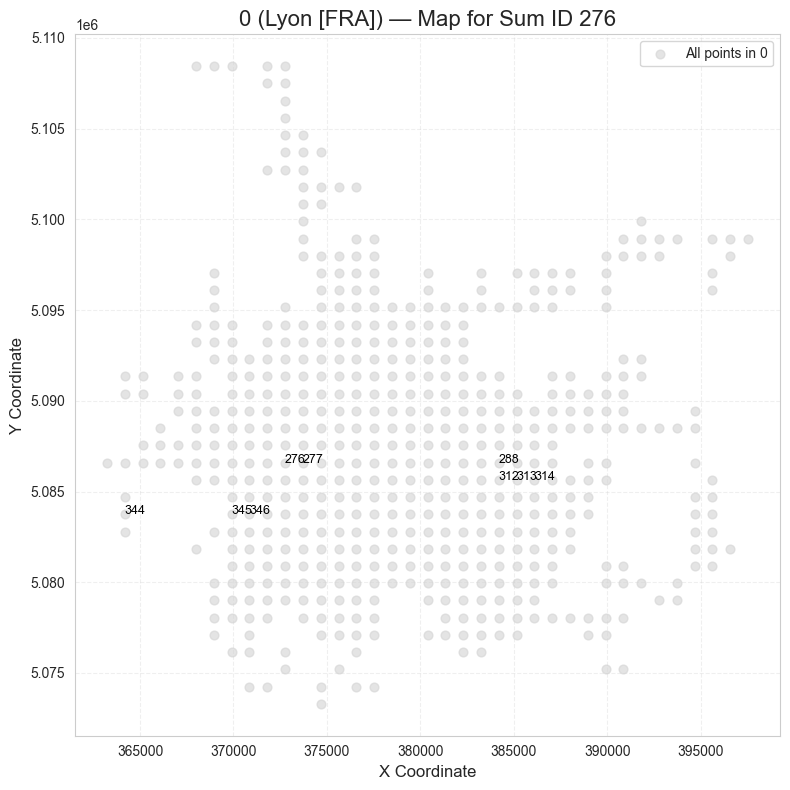

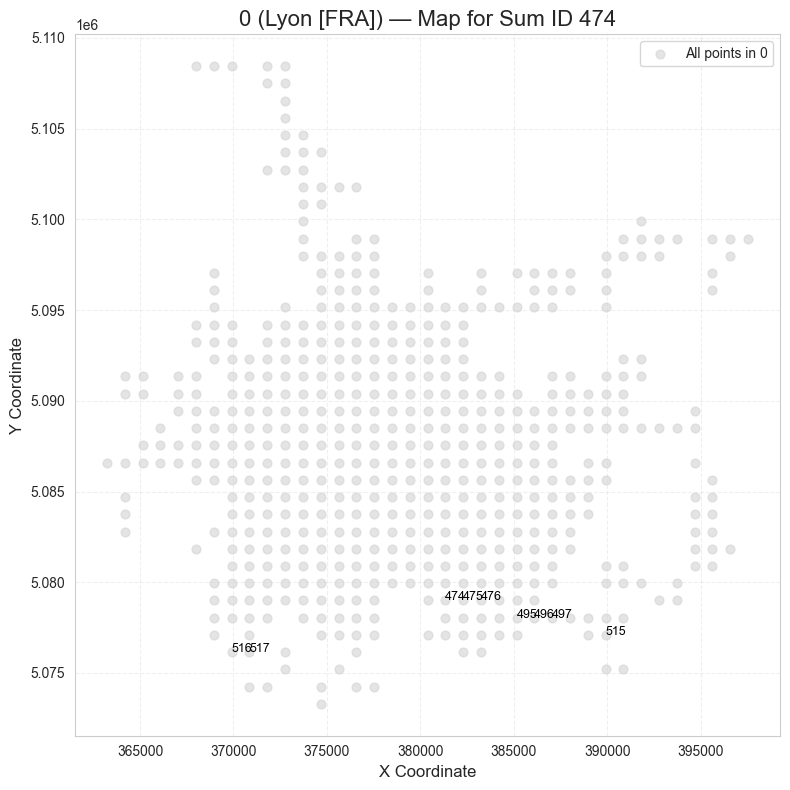

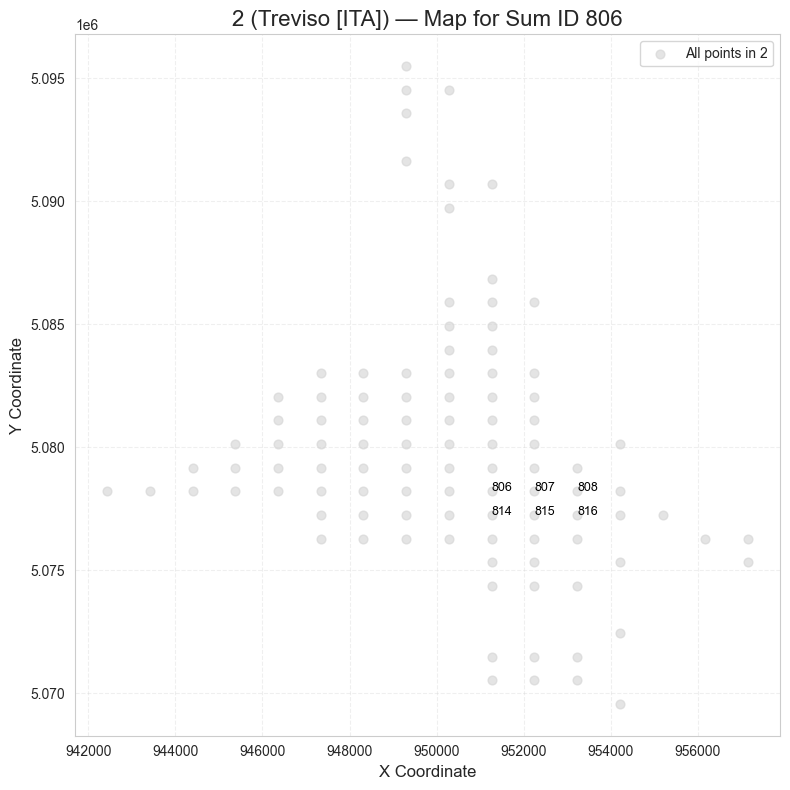

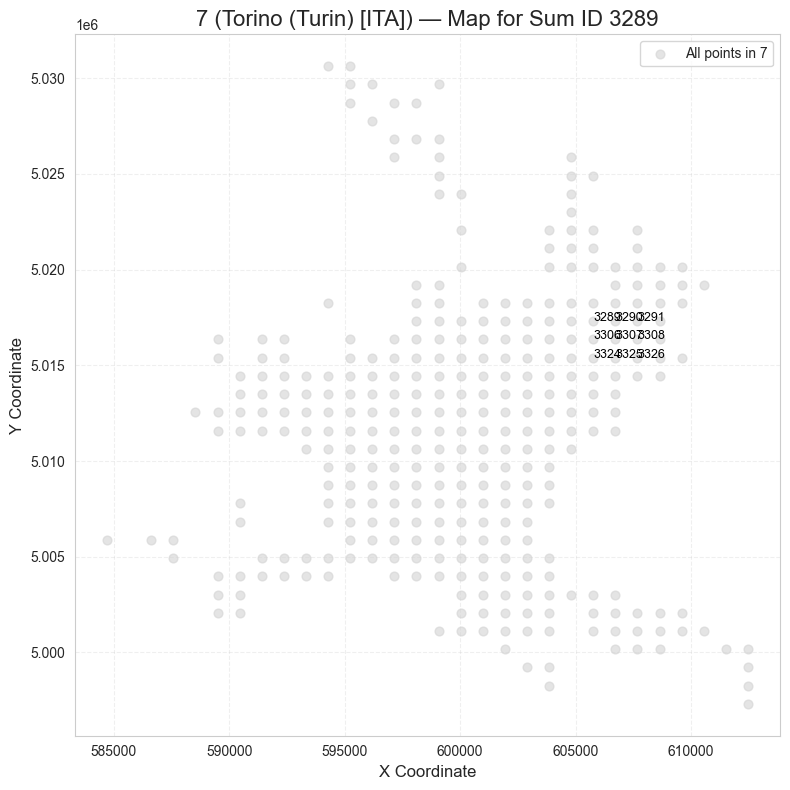

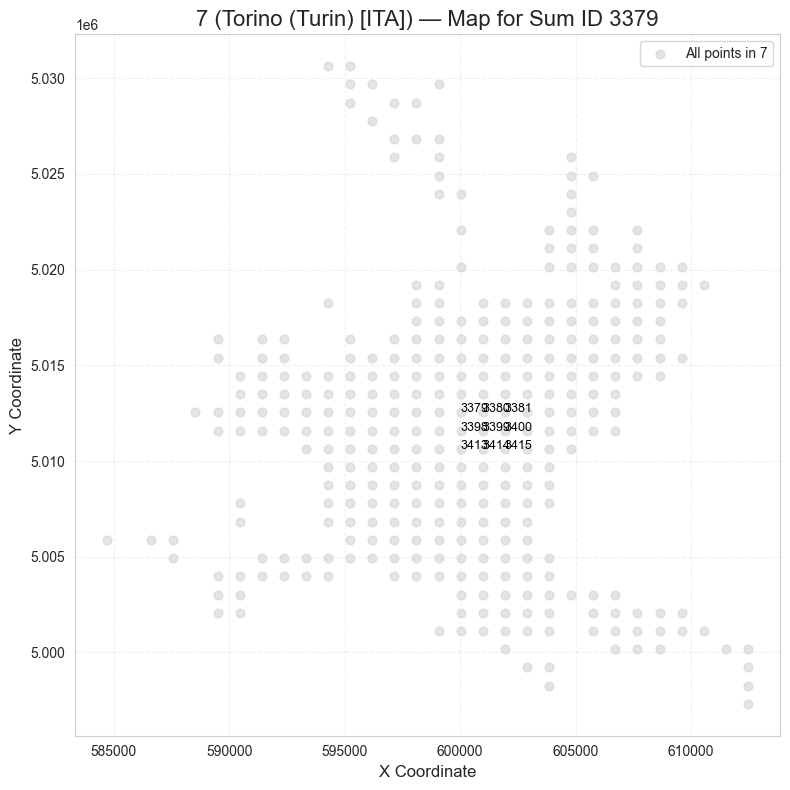

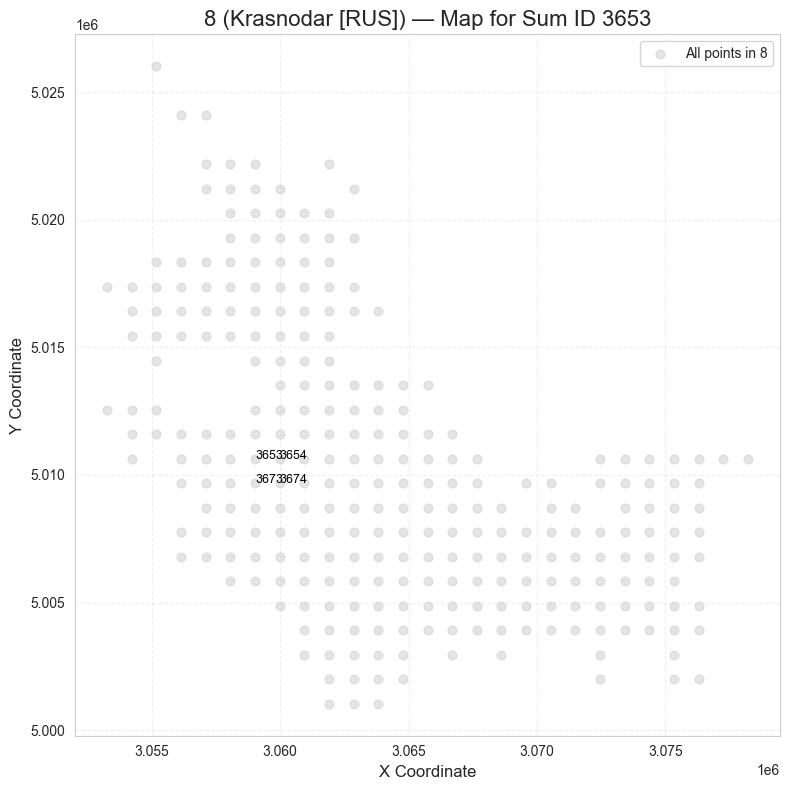

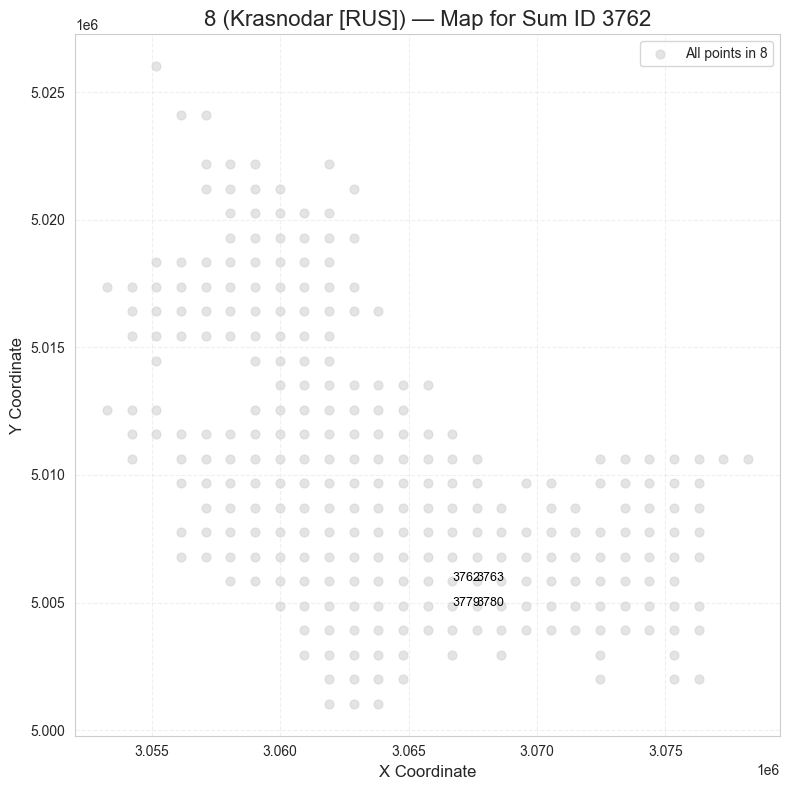

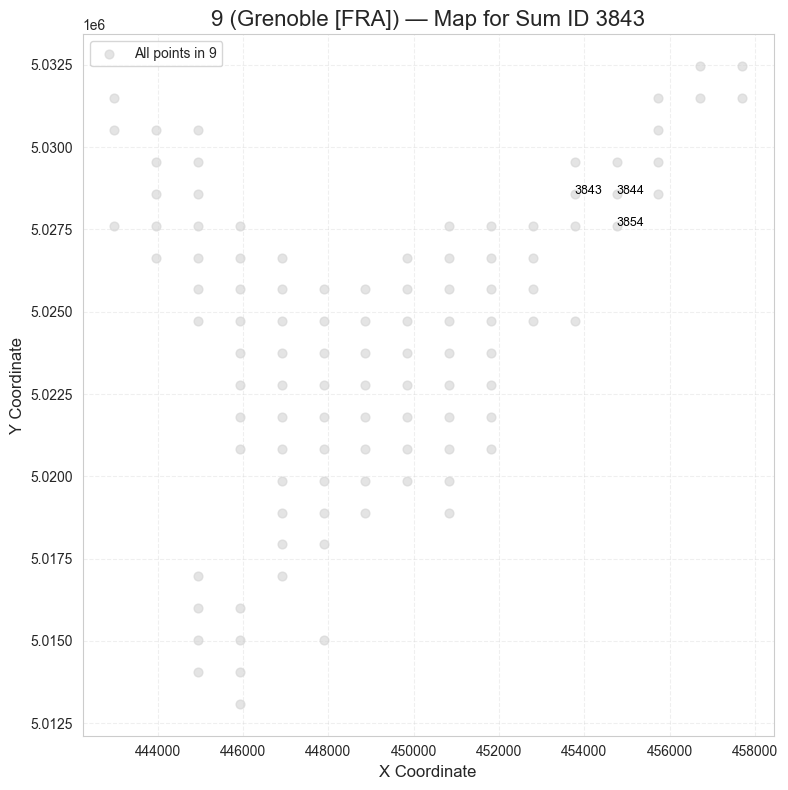

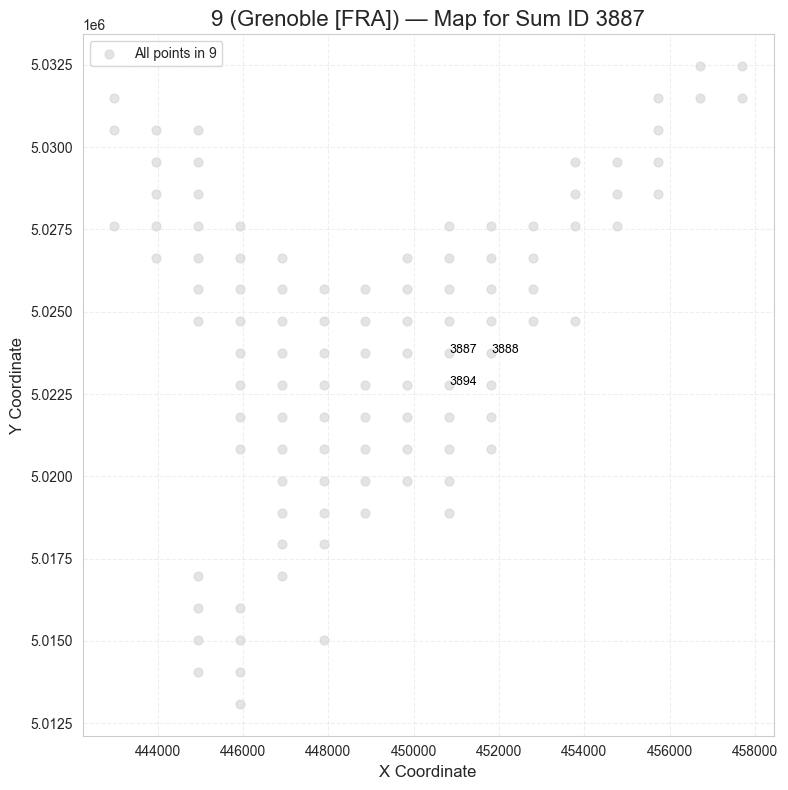

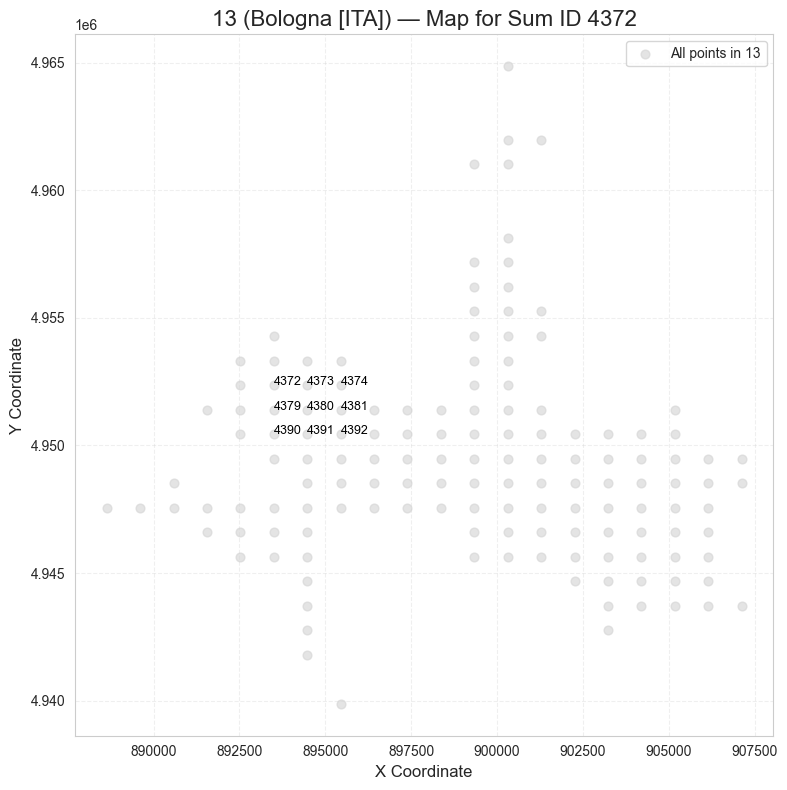

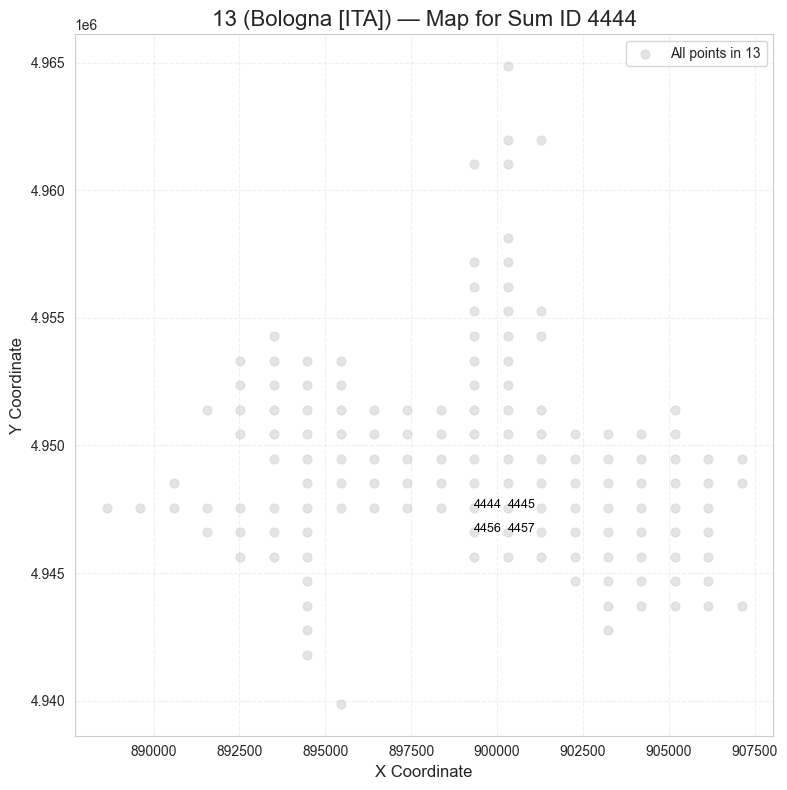

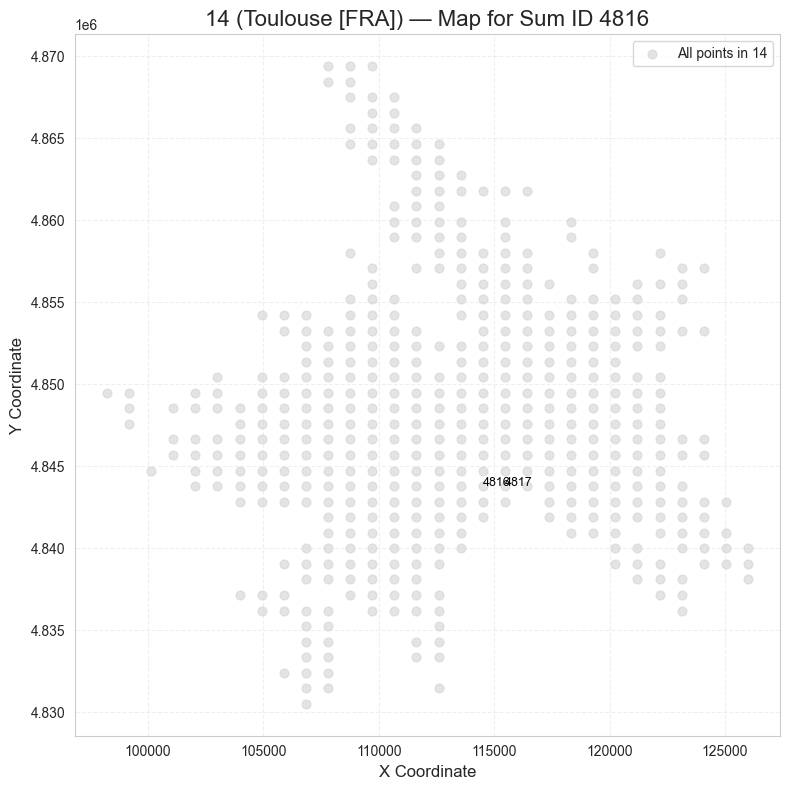

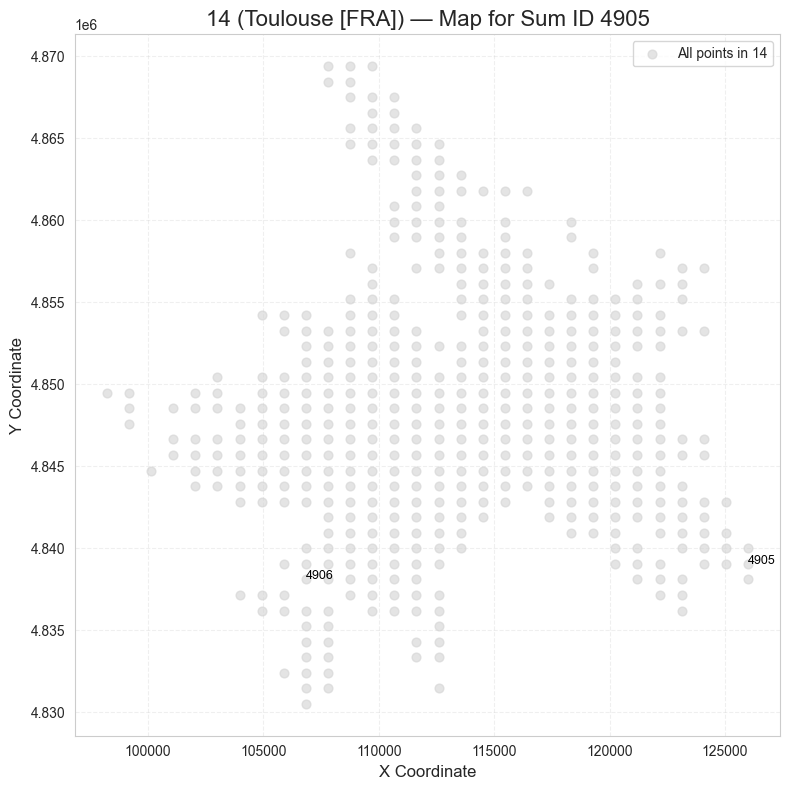

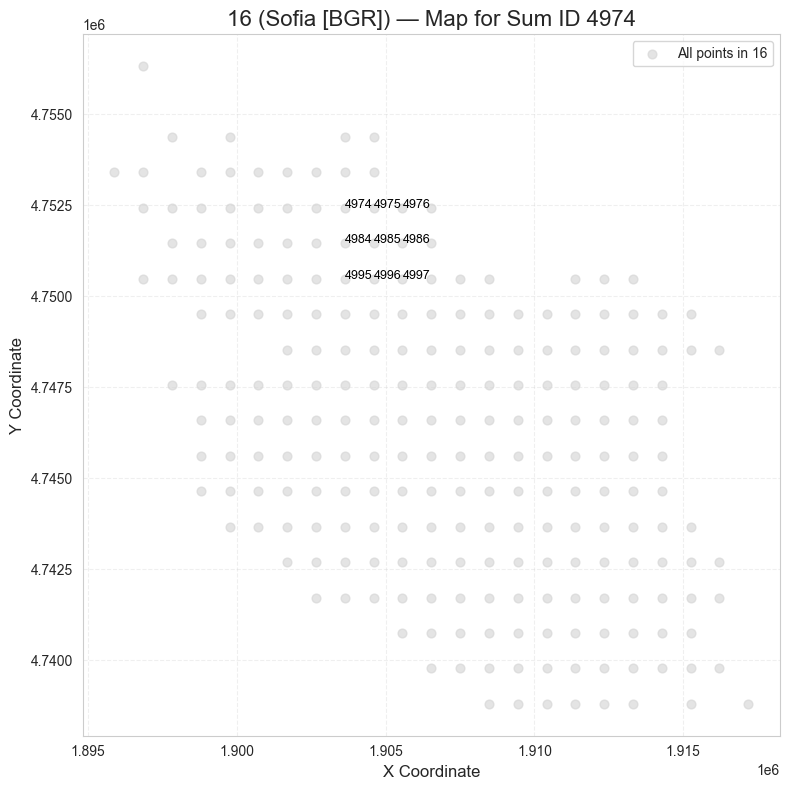

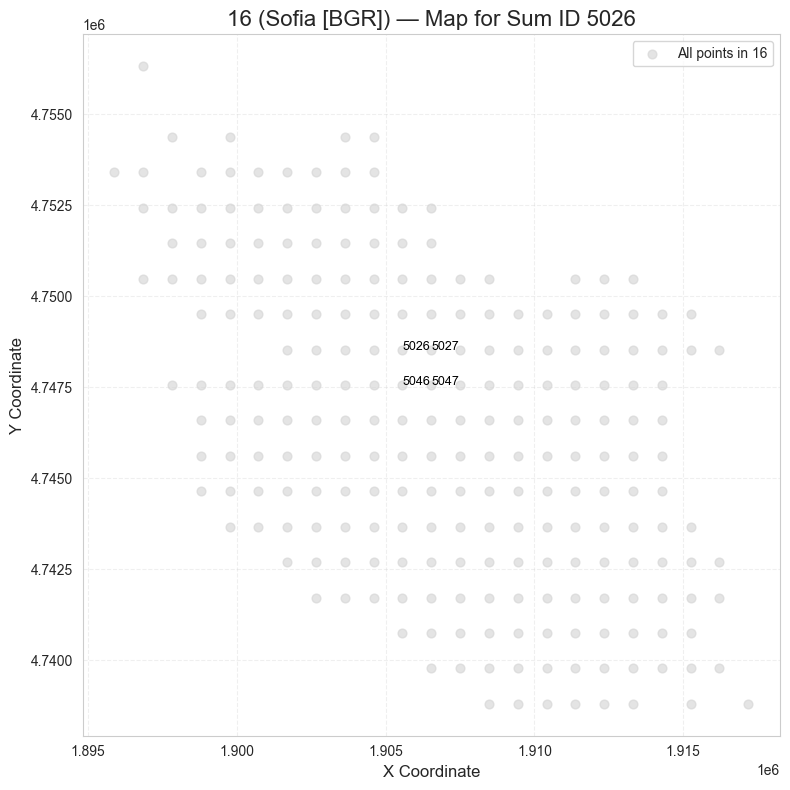

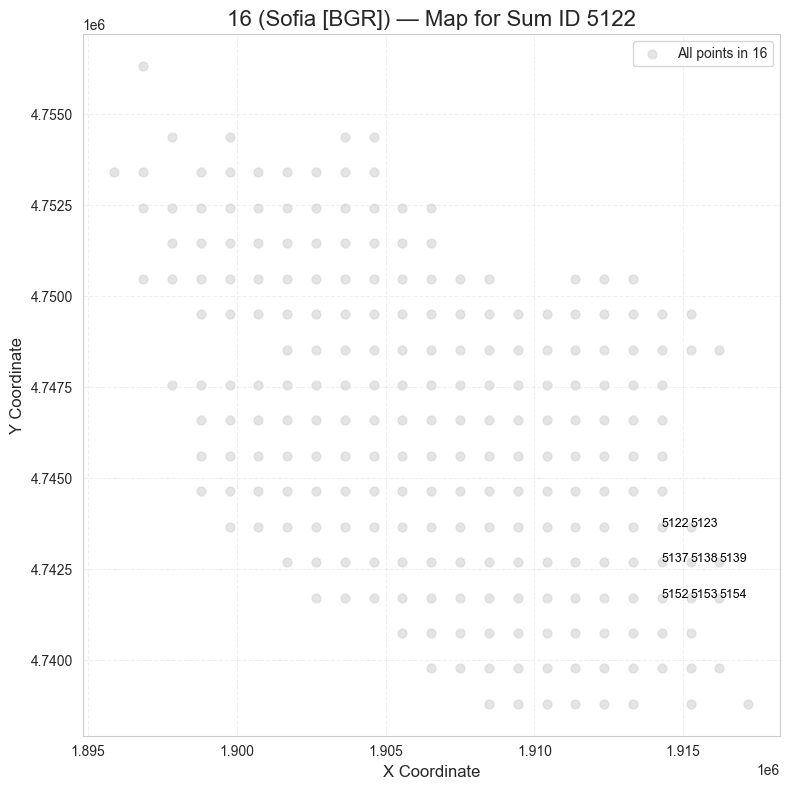

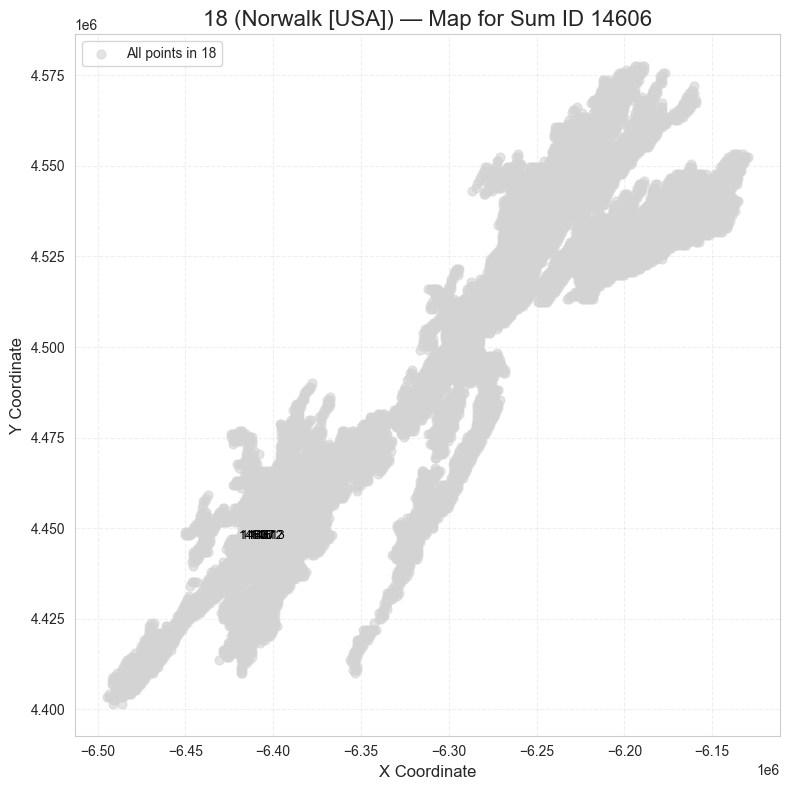

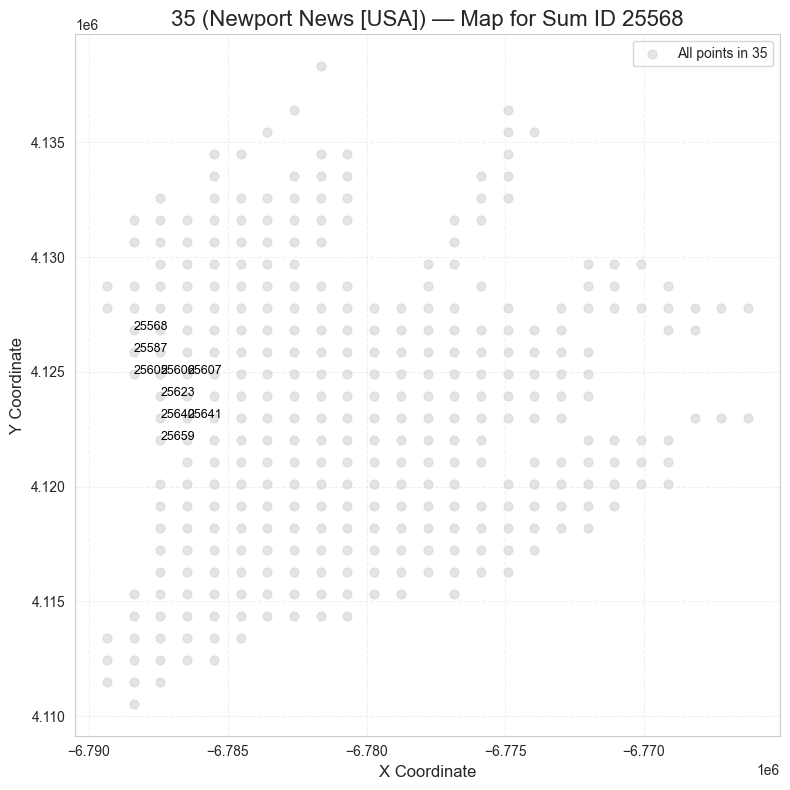

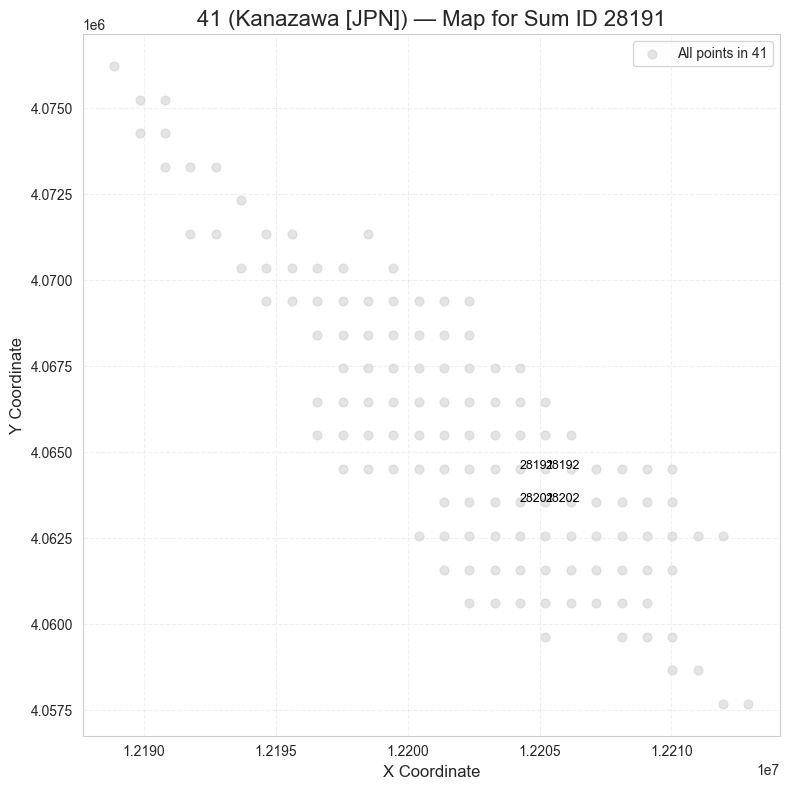

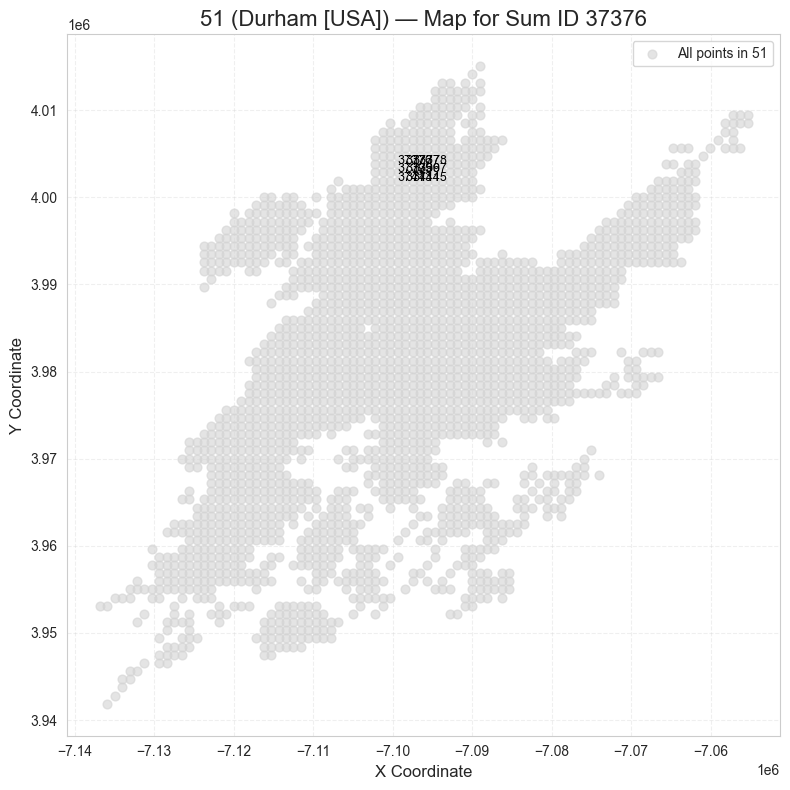

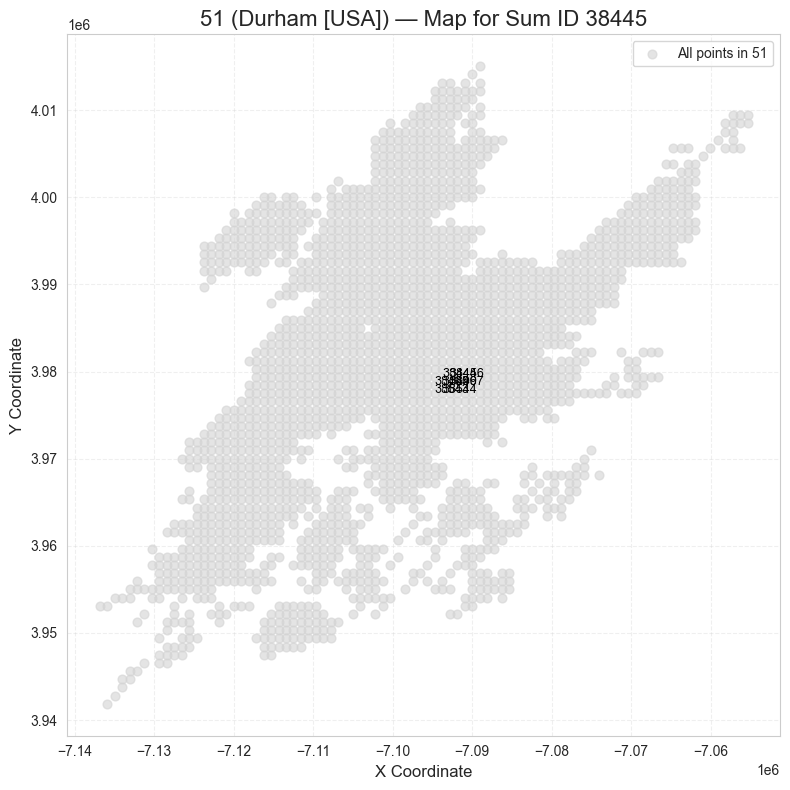

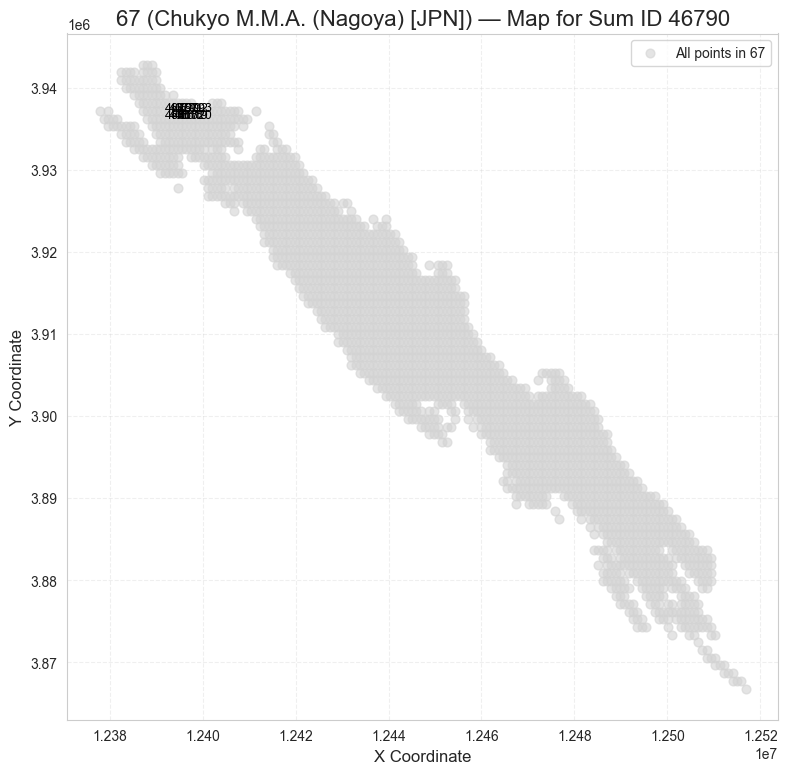

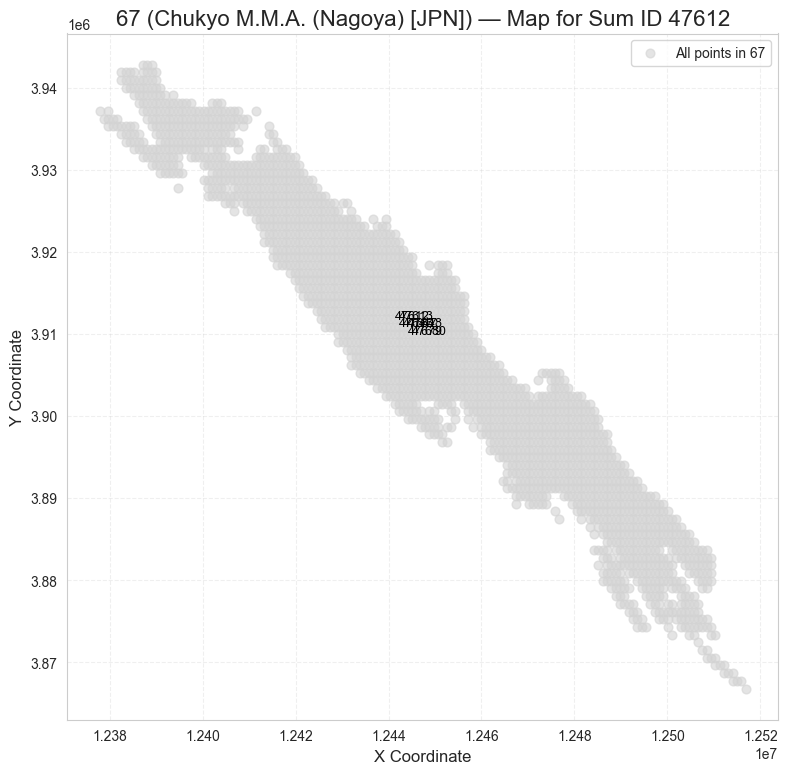

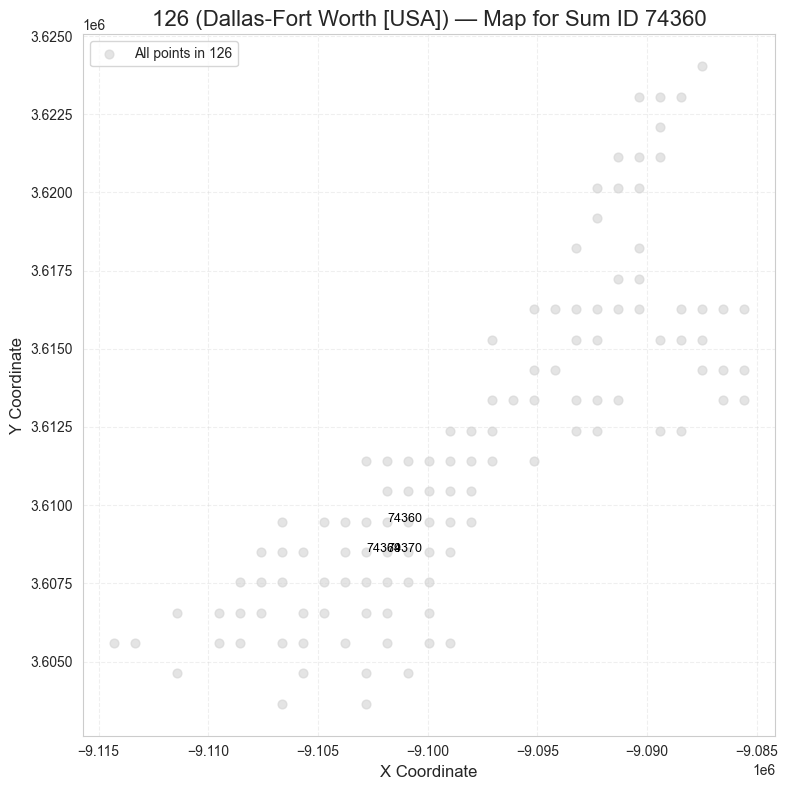

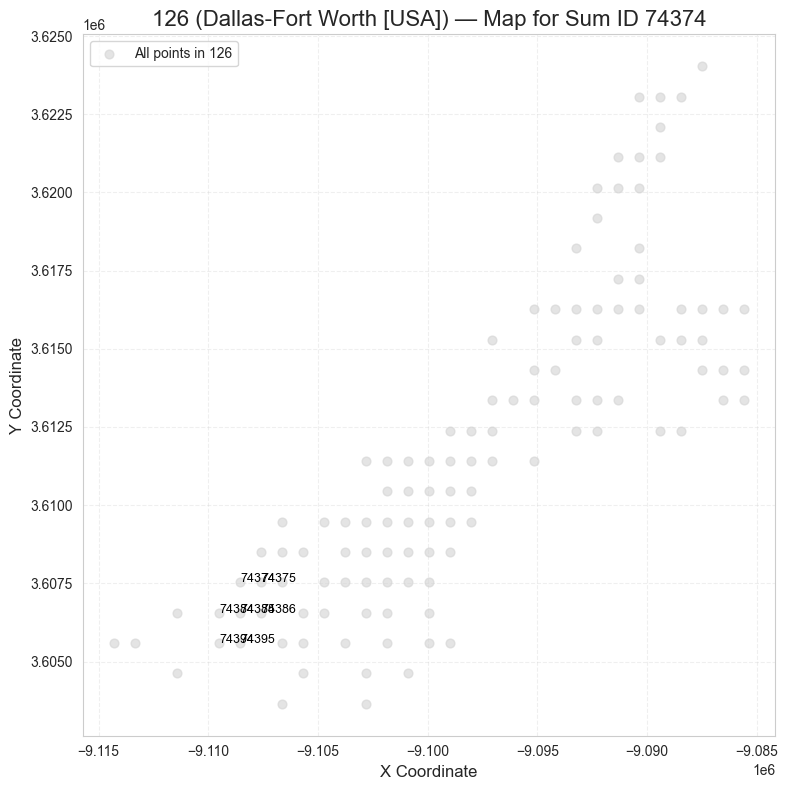

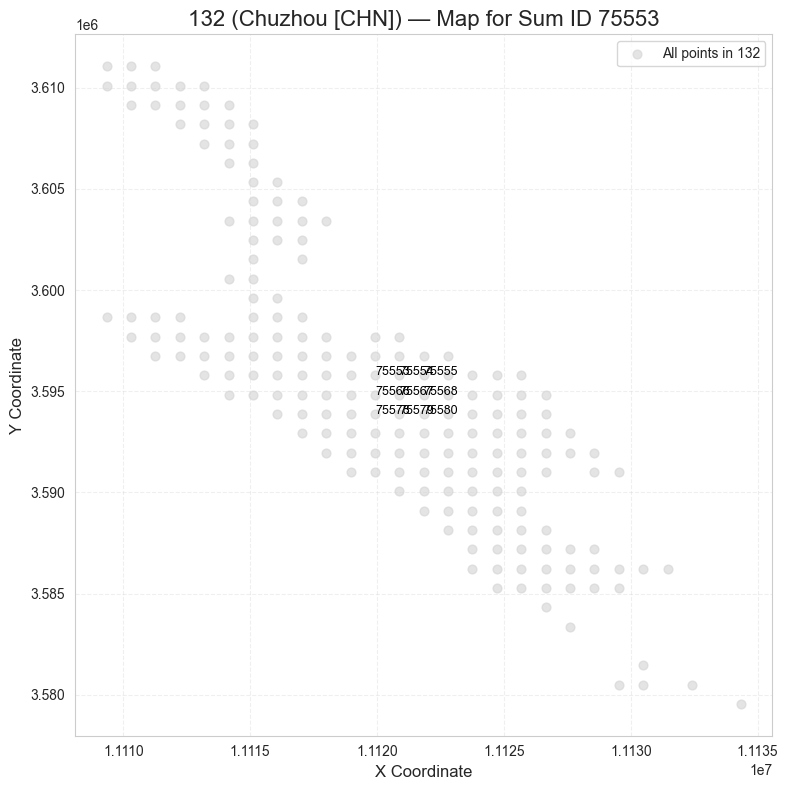

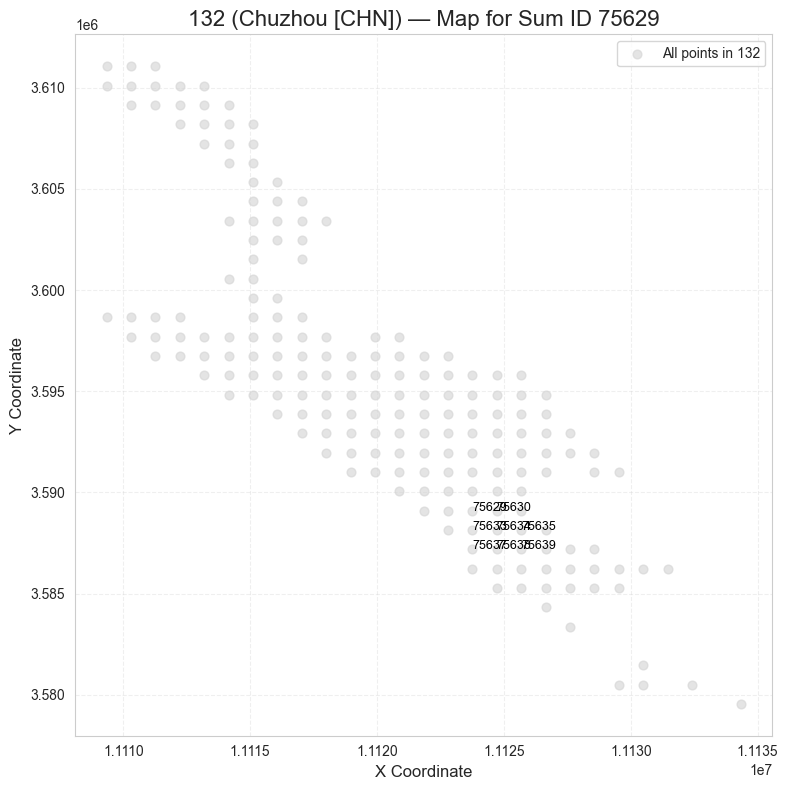

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def plot_cluster_data(file_path, find_id_path, K, output_folder):
    # 1. 读取 CSV 和 Excel
    data = pd.read_csv(file_path)
    id_df = pd.read_excel(find_id_path, header=None)

    # 2. 提取所有 Sum ID 和对应的 neighbor IDs（value_list）
    all_ids       = id_df.iloc[:, 0].tolist()
    all_neighbors = [row[1:].dropna().tolist() for _, row in id_df.iterrows()]

    # 3. 主循环：对每个 Sum ID 画一张图
    for sum_id, neighbor_ids in zip(all_ids, all_neighbors):
        # 3.1 核心 DataFrame
        core_df = data[data['Sum ID'] == sum_id]
        if core_df.empty:
            continue  # 如果 CSV 里没有这条，跳过

        city     = core_df['Place'].iloc[0]
        place_id = core_df['City Name'].iloc[0]
        cluster  = core_df['Cluster'].iloc[0]

        # 3.2 时间序列列的索引（第 3 列到倒数第 6 列）
        ts_cols = core_df.columns[2:-5]
        columns = np.arange(len(ts_cols))

        # 3.3 核心曲线
        core_series = core_df[ts_cols].iloc[0].tolist()

        # 4. 绘图
        fig, ax = plt.subplots(figsize=(20, 6))
        fig.patch.set_facecolor('white')
        ax.set_facecolor('white')

        # 4.1 先画所有 neighbor 曲线（浅灰色）
        for nb_id in neighbor_ids:
            nb_df = data[data['Sum ID'] == nb_id]
            if nb_df.empty:
                continue
            nb_series = nb_df[ts_cols].iloc[0].tolist()
            if len(nb_series) == len(columns):
                ax.plot(columns, nb_series,
                        color='lightgray',
                        linewidth=1,
                        alpha=0.5)
        # 用一条“空”曲线做 legend proxy
        ax.plot([], [], color='#999999', linewidth=1, alpha=0.5,
                label='Neighbor Curves')

        # 4.2 核心 city 曲线（深色粗线）
        ax.plot(columns, core_series,
                color='black',
                linewidth=2,
                label=f'Sum ID {sum_id}',
                zorder=10)


        # 5. 图例 & 美化
        ax.set_title(f'{city}_{place_id}  K={K}  Cluster={cluster}', fontsize=18)
        ax.set_xlabel('Day', fontsize=14)
        ax.set_ylabel('slide_TEM', fontsize=14)
        ax.legend(loc='upper right', fontsize=12)
        ax.grid(False)
        plt.xticks(columns[::50], rotation=90)
        ax.set_xlim(0, len(columns))
        ax.set_ylim(-12, 12)
        plt.tight_layout()

        # 6. 保存 & 展示
        os.makedirs(output_folder, exist_ok=True)
        out_path = os.path.join(
            output_folder,
            f'{city}_{place_id}_Sum ID{sum_id}_K{K}.jpg'
        )
        plt.savefig(out_path, dpi=100, bbox_inches='tight')
        plt.show()

# 使用示例
if __name__ == '__main__':
    K = 11
    file_path     = r'D:\file\d_som\223_cities_combined_moving_ave_cluster_sort.csv'
    find_id_path  = r'C:\Users\owner\Desktop\Sum ID.xlsx'
    output_folder = r'D:\file\d_som\results\picture\city_abnormal'
    plot_cluster_data(file_path, find_id_path, K, output_folder)

# 绘制map

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_ids_map(file_path, find_id_path,
                 x_col='X', y_col='Y',
                 id_col='Sum ID',
                 place_col='Place',
                 place_name_col='City Name',
                 output_folder='maps'):
    """
    对 Excel 中所有 Sum ID，对应它们所在城市画地图：
      • 城市里所有点：浅灰
      • 对应 Sum ID：红星
      • 对应 neighbor IDs：黑点
    """
    # 1. 读取数据
    data  = pd.read_csv(file_path)
    id_df = pd.read_excel(find_id_path, header=None)

    # 2. 提取所有 Sum ID 和对应的 neighbor IDs
    all_ids       = id_df.iloc[:, 0].dropna().astype(int).tolist()
    all_neighbors = [row[1:].dropna().astype(int).tolist()
                     for _, row in id_df.iterrows()]

    # 3. 确保输出目录
    os.makedirs(output_folder, exist_ok=True)

    # 4. 对每个 Sum ID 单独画一张图
    for sum_id, neighbor_ids in zip(all_ids, all_neighbors):
        core_df = data[data[id_col] == sum_id]
        if core_df.empty:
            continue

        # 取出 place 和 place_name 的实际值
        city           = core_df[place_col].iloc[0]
        place_name_val = core_df[place_name_col].iloc[0]

        # 整个城市所有点
        city_df = data[data[place_col] == city]
        xs = city_df[x_col]
        ys = city_df[y_col]

        # 开始绘图
        fig, ax = plt.subplots(figsize=(8, 8))
        fig.patch.set_facecolor('white')
        ax.set_facecolor('white')

        # 全部 city 点：浅灰
        ax.scatter(xs, ys, s=40,
                   color='lightgray', alpha=0.6,
                   label=f'All points in {city}')

        # neighbor IDs：黑点
        for nb in neighbor_ids:
            nb_df = city_df[city_df[id_col] == nb]
            if not nb_df.empty:
                ax.scatter(nb_df[x_col], nb_df[y_col],
                           s=60, color='black',
                           label='Neighbor IDs' if nb == neighbor_ids[0] else "")

        # 当前 Sum ID：红星
        x0 = core_df[x_col].iloc[0]
        y0 = core_df[y_col].iloc[0]
        ax.scatter(x0, y0, s=100,
                   color='red', marker='*',
                   label=f'Sum ID {sum_id}')

        # 美化 & 保存
        ax.set_title(f'{city} ({place_name_val}) — Map for Sum ID {sum_id}', fontsize=16)
        ax.set_xlabel(f'{x_col} Coordinate', fontsize=12)
        ax.set_ylabel(f'{y_col} Coordinate', fontsize=12)
        ax.legend(loc='best', fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.3)
        plt.tight_layout()

        filename = f'{city}_{place_name_val}_SumID{sum_id}_map.jpg'
        out_path = os.path.join(output_folder, filename)
        plt.savefig(out_path, dpi=150, bbox_inches='tight')
        plt.show()


# 用法示例
if __name__ == '__main__':
    plot_ids_map(
        file_path=r'D:\file\d_som\223_cities_combined_moving_ave_cluster_sort.csv',
        find_id_path=r'C:\Users\owner\Desktop\Sum ID.xlsx',
        x_col='X',
        y_col='Y',
        id_col='Sum ID',
        place_col='Place',
        place_name_col='City Name',
        output_folder=r'D:\file\d_som\results\picture\city_abnormal\maps'
    )
